In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = 'london_house_final.csv'
df = pd.read_csv(data)

print(df.columns)

Index(['postcodeWeight', 'bedrooms', 'floorArea', 'propertyType_weight',
       'saleEstimate'],
      dtype='object')


In [8]:
# Data preprocessing
X = df[['postcodeWeight', 'bedrooms', 'floorArea', 'propertyType_weight']].values  # Features
y = df['saleEstimate'].values    # Target: Current sale price

In [9]:
#Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Initial dataset contains {X.shape[0]} records.")
print(f"Training set contains {X_train.shape[0]} records.")
print(f"Test set contains {X_test.shape[0]} records.")

Initial dataset contains 40002 records.
Training set contains 32001 records.
Test set contains 8001 records.


In [10]:
#Test the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Mean Absolute Error (MAE): 241.02776270486385
Mean Squared Error (MSE): 170393.51094210788
R² Score: 0.6723101524727428


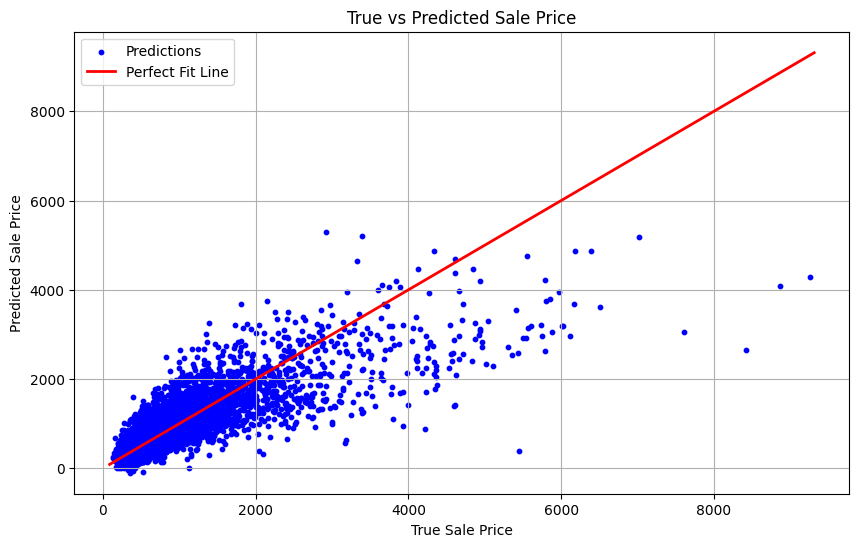

In [11]:
# Predictions from the model
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=10, label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label="Perfect Fit Line")  # Perfect fit line
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("True vs Predicted Sale Price")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Make a prediction for a specific set of features 
X_new = [[0.5, 2, 83, 0.29]]  # A purpose-built two-bedroom flat, 83 sqm, in E1W 
print(model.predict(X_new))  

[559.68561515]
